In [1]:
#import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
tensorflow.keras.__version__

'2.2.4-tf'

In [2]:
#import data
data = pd.read_csv('MLB_data.csv')
data.head()

,Unnamed: 0,Player ID,First Name,Last Name,Year,AB,H,HR,RBI,SO,POS,Adjusted Salary,BA
0,63,abreubo01,Bobby,Abreu,1999,546,183,20,93.0,113.0,OF,576247,0.335
1,64,abreubo01,Bobby,Abreu,2000,576,182,25,79.0,116.0,OF,4088388,0.316
2,65,abreubo01,Bobby,Abreu,2001,588,170,31,110.0,137.0,OF,6752992,0.289
3,66,abreubo01,Bobby,Abreu,2002,572,176,20,85.0,117.0,OF,8449384,0.308
4,67,abreubo01,Bobby,Abreu,2003,577,173,20,101.0,126.0,OF,11869911,0.300


In [3]:
#features
X = data[["Year", "AB", "H", "HR", "RBI", "BA"]]
y = data["Adjusted Salary"]
print(X.shape, y.shape)

(3028, 6) (3028,)


In [4]:
#more dependencies for ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

y.dtypes

dtype('int64')

In [5]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)

In [6]:
#scale 
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [7]:
#dependencies for tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [8]:
#neural net architecture
model = Sequential()
model.add(Dense(units=100, activation='relu', input_dim=6))
model.add(Dense(units=100, activation='relu'))
model.add(Dense(units=1, activation='linear'))

In [9]:
from keras import losses

model.compile(optimizer='adam',
              loss= losses.mean_squared_error,
              metrics=[losses.mean_squared_error])

model.summary()

Using TensorFlow backend.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               700       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 10,901
Trainable params: 10,901
Non-trainable params: 0
_________________________________________________________________


In [11]:
#train model
model.fit(
    X_train_scaled,
    y_train.to_numpy(),
    epochs=300,
    shuffle=True,
    verbose=2
)

Train on 2271 samples
Epoch 1/300
2271/2271 - 1s - loss: 54200101041597.9453 - mean_squared_error: 54200109105152.0000
Epoch 2/300
2271/2271 - 0s - loss: 54199283159705.5312 - mean_squared_error: 54199274438656.0000
Epoch 3/300
2271/2271 - 0s - loss: 54195644971288.4609 - mean_squared_error: 54195637977088.0000
Epoch 4/300
2271/2271 - 0s - loss: 54186524397216.2969 - mean_squared_error: 54186523754496.0000
Epoch 5/300
2271/2271 - 0s - loss: 54169453956703.3672 - mean_squared_error: 54169452937216.0000
Epoch 6/300
2271/2271 - 0s - loss: 54142036520979.8359 - mean_squared_error: 54142034771968.0000
Epoch 7/300
2271/2271 - 0s - loss: 54102207376951.6875 - mean_squared_error: 54102201466880.0000
Epoch 8/300
2271/2271 - 0s - loss: 54048086977764.6094 - mean_squared_error: 54048086556672.0000
Epoch 9/300
2271/2271 - 0s - loss: 53977339230914.1094 - mean_squared_error: 53977341231104.0000
Epoch 10/300
2271/2271 - 0s - loss: 53888328439103.6875 - mean_squared_error: 53888325517312.0000
Epoch 1

Epoch 85/300
2271/2271 - 0s - loss: 25477710325201.7812 - mean_squared_error: 25477714542592.0000
Epoch 86/300
2271/2271 - 0s - loss: 25455773211225.5039 - mean_squared_error: 25455778332672.0000
Epoch 87/300
2271/2271 - 0s - loss: 25437961715134.8477 - mean_squared_error: 25437960929280.0000
Epoch 88/300
2271/2271 - 0s - loss: 25421790929743.6992 - mean_squared_error: 25421787693056.0000
Epoch 89/300
2271/2271 - 0s - loss: 25406977971779.4102 - mean_squared_error: 25406988091392.0000
Epoch 90/300
2271/2271 - 0s - loss: 25394167622213.6641 - mean_squared_error: 25394164006912.0000
Epoch 91/300
2271/2271 - 0s - loss: 25381440446748.9688 - mean_squared_error: 25381440585728.0000
Epoch 92/300
2271/2271 - 0s - loss: 25371358645227.7070 - mean_squared_error: 25371355381760.0000
Epoch 93/300
2271/2271 - 0s - loss: 25360956292037.8359 - mean_squared_error: 25360961896448.0000
Epoch 94/300
2271/2271 - 0s - loss: 25350586876416.2266 - mean_squared_error: 25350587285504.0000
Epoch 95/300
2271/22

Epoch 168/300
2271/2271 - 0s - loss: 24747477956866.8203 - mean_squared_error: 24747473633280.0000
Epoch 169/300
2271/2271 - 0s - loss: 24738263915934.3789 - mean_squared_error: 24738265038848.0000
Epoch 170/300
2271/2271 - 0s - loss: 24731655416909.1055 - mean_squared_error: 24731659010048.0000
Epoch 171/300
2271/2271 - 0s - loss: 24723187608407.8125 - mean_squared_error: 24723186515968.0000
Epoch 172/300
2271/2271 - 0s - loss: 24715368454283.7812 - mean_squared_error: 24715366236160.0000
Epoch 173/300
2271/2271 - 0s - loss: 24708865780632.7422 - mean_squared_error: 24708858773504.0000
Epoch 174/300
2271/2271 - 0s - loss: 24700251466995.0391 - mean_squared_error: 24700254158848.0000
Epoch 175/300
2271/2271 - 0s - loss: 24693656857561.6719 - mean_squared_error: 24693652324352.0000
Epoch 176/300
2271/2271 - 0s - loss: 24685748494137.6016 - mean_squared_error: 24685741867008.0000
Epoch 177/300
2271/2271 - 0s - loss: 24676924101922.8320 - mean_squared_error: 24676917051392.0000
Epoch 178/

Epoch 251/300
2271/2271 - 0s - loss: 24147479266102.4453 - mean_squared_error: 24147482640384.0000
Epoch 252/300
2271/2271 - 0s - loss: 24139601888999.5391 - mean_squared_error: 24139601543168.0000
Epoch 253/300
2271/2271 - 0s - loss: 24132156393155.4648 - mean_squared_error: 24132154556416.0000
Epoch 254/300
2271/2271 - 0s - loss: 24125149283804.6055 - mean_squared_error: 24125145874432.0000
Epoch 255/300
2271/2271 - 0s - loss: 24117777994912.9727 - mean_squared_error: 24117774385152.0000
Epoch 256/300
2271/2271 - 0s - loss: 24113147245970.6562 - mean_squared_error: 24113148067840.0000
Epoch 257/300
2271/2271 - 0s - loss: 24106961181324.0078 - mean_squared_error: 24106963566592.0000
Epoch 258/300
2271/2271 - 0s - loss: 24097955010541.0625 - mean_squared_error: 24097958395904.0000
Epoch 259/300
2271/2271 - 0s - loss: 24091965819616.7734 - mean_squared_error: 24091968929792.0000
Epoch 260/300
2271/2271 - 0s - loss: 24085345666668.8945 - mean_squared_error: 24085341929472.0000
Epoch 261/

In [ ]:
model_loss, model_accuracy = model.evaluate(
    X_test_scaled, y_test, verbose=2)
print(
    f"Normal Neural Network - Loss: {model_loss}, Accuracy: {model_accuracy}")

In [16]:
encoded_predictions = model.predict(X_test_scaled[:20])
#r2 = r2_score(y_test, model.predict(X_test_scaled))
encoded_predictions
#print(r2)
Prediction = model.predict(X_test_scaled)
test_predictions = Prediction.reshape(-1)


In [28]:
y_reshaped = np.reshape(y_test, -1)
y_train_reshaped = np.reshape(y_train, -1)

len(y_reshaped)
len(model.predict(X_train_scaled))

print(y_train_reshaped.shape)
print(y_reshaped.shape)

(2271,)
(757,)


In [30]:
train_predictions = np.reshape(model.predict(X_train_scaled), -1)


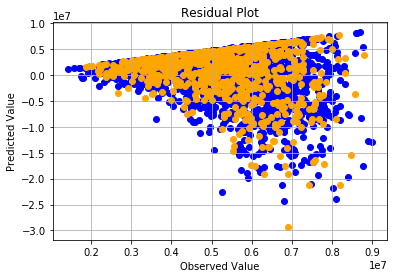

In [33]:
#plot
plt.scatter(train_predictions, train_predictions - y_train_reshaped, c="blue", label="Training Data")
plt.scatter(test_predictions, test_predictions - y_reshaped, c="orange", label="Testing Data")

plt.ylabel("Predicted Value")
plt.xlabel("Observed Value")
plt.grid(True)

plt.savefig("Output_Plots/cnn_Residual_Plot.png")
plt.title("Residual Plot")
plt.show()


